## Prediction of bank customer's satisfaction using ANN

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## EDA 

In [76]:
# read the dataset

df = pd.read_csv('D:/ML_learning/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [77]:
# lets remove unnacesary data
X= df.iloc[:, 3:13]
y= df.iloc[:, 13]

In [110]:
df.shape

(10000, 14)

In [78]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [79]:
# convert categorical variables using one hot encoding
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [80]:
# concat the data after one hot encoding
X = pd.concat([X, geography, gender], axis=1)

In [81]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [82]:
# drop the original features
X= X.drop(['Geography', 'Gender'], axis=1)

In [83]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [84]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## ANN MODEL 

### Perform Hyperparameter Optimization

In [86]:
# import libraries from keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU, PReLU
from keras.layers import Activation, Embedding, LeakyReLU, BatchNormalization
from keras.layers import Dropout

In [87]:
# create a general model which we will optimize

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1])) ## in the first layer: provide the inputs each time
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [88]:
# building KerasClassfier 
model = KerasClassifier(build_fn=create_model, verbose=0)

In [89]:
# Grid searchcv
layers = [(20,), (40, 20), (45, 30, 15)] #first time 1 hidden layer with 20 neurons, next 2 hidden layers with 40 and 20 neurons
activations = ['sigmoid', 'relu'] # check which activation function works
# batches = [(128,256)]
# epochs = [(30,)]
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5) # gridsearch CV

In [90]:
grid_result = grid.fit(X_train, y_train)

In [91]:
[grid_result.best_score_,grid_result.best_params_]

[0.8552499890327454,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)}]

In [93]:
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

In [94]:
classifier = Sequential()

In [95]:
# adding input layer and first hidden layer
classifier.add(Dense(units = 40, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [96]:
# adding second hidden layer, we have used he_uniform weight initilization technique with relu activation function
classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform', activation= 'relu' ))

In [97]:
# # adding third hidden layer, we have used he_uniform weight initilization technique with relu activation function
# classifier.add(Dense(units = 15, kernel_initializer = 'he_uniform', activation= 'relu' ))

In [98]:
# ouptput layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation= 'sigmoid' ))

In [99]:
classifier.summary()

Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_619 (Dense)            (None, 40)                480       
_________________________________________________________________
dense_620 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_621 (Dense)            (None, 1)                 21        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [100]:
# compiling the ANN
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [101]:
# fitting the data
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 128, epochs = 30)

Epoch 1/30
42/42 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6932 - val_loss: 0.4988 - val_accuracy: 0.7899
Epoch 2/30
42/42 [==============================] - 0s 760us/step - loss: 0.4819 - accuracy: 0.7974 - val_loss: 0.4645 - val_accuracy: 0.8012
Epoch 3/30
42/42 [==============================] - 0s 760us/step - loss: 0.4502 - accuracy: 0.8110 - val_loss: 0.4458 - val_accuracy: 0.8046
Epoch 4/30
42/42 [==============================] - 0s 807us/step - loss: 0.4303 - accuracy: 0.8184 - val_loss: 0.4341 - val_accuracy: 0.8092
Epoch 5/30
42/42 [==============================] - 0s 775us/step - loss: 0.4170 - accuracy: 0.8270 - val_loss: 0.4255 - val_accuracy: 0.8167
Epoch 6/30
42/42 [==============================] - 0s 760us/step - loss: 0.4073 - accuracy: 0.8306 - val_loss: 0.4177 - val_accuracy: 0.8186
Epoch 7/30
42/42 [==============================] - 0s 807us/step - loss: 0.3974 - accuracy: 0.8386 - val_loss: 0.4123 - val_accuracy: 0.8183
Epoch 8/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


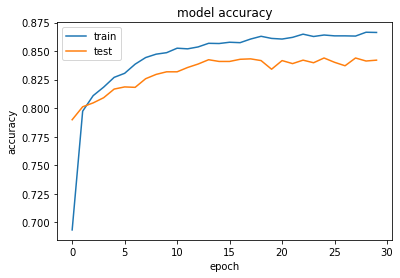

In [102]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

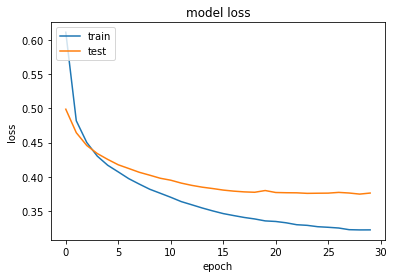

In [103]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
# test it on testing data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [106]:
cm

array([[1518,   77],
       [ 212,  193]], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)


In [109]:
#test accuracy 
score

0.8555